# LEFT-WALL tests `2018-04-14`
Results stared via [http://88.99.210.144/data/clustering_2018/AGI-2018/Left-Wall-Tests.html](http://88.99.210.144/data/clustering_2018/AGI-2018/Left-Wall-Tests.html)  
A static html copy of this notebook shared via  
[http://88.99.210.144/data/clustering_2018/AGI-2018/Left-Wall-Tests/](http://88.99.210.144/data/clustering_2018/AGI-2018/Left-Wall-Tests/)

## Introduction

In [1]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.utl.utl import UTC
from src.utl.read_files import check_dir
print(UTC(), module_path)
prefix = '' # unused option
tmpath = module_path + '/tmp/'
check_dir(tmpath, True, 'none')
from src.grammar_learner.poc03 import learn_grammar

2018-04-17 16:50:50 UTC /home/obaskov/language-learning


## Settings, parameters, data

In [2]:
# Settings given below:
# Directory to read parse files (1 to many input files)
# - input_dir = module_path + '/data/POC_English_NoAmb/...'
# - input_dir = module_path + '/data/POC_Turtle/...'
# Paths to store learned categories, learned dictionary Link Grammar file
# batch_dir = module_path + '/output/Left-Wall-2018-04-12/...'
# prj_dir = batch_dir + 'MST_fixed_manually/disjuncts-DRK-disjuncts/'
# if check_dir(prj_dir, create=True, verbose='max'):
#    cat_path = prj_dir  # Path to store learned categories
#    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

# Settings:
parse_mode = 'given'            # 'given' (default) / 'explosive' (next)
#left_wall = 'LEFT-WALL'         # '','none' - don't use / 
                                # 'string' - replace ###LEFT-WALL### with the string
period = True                   # use period in links learning: True/False
#-learn_mode = 'connectors_only'  # ~ context = 1, window = 'mst', weighting = 'ppmi'
#-learn_mode = 'lexical_entries'  # ~ context = 2, group = True, 
# learn_mode decomposed:
# context = 1                     # 1: connectors / 0: 'words' /
context = 2                     # 2,3...: disjuncts with limited number of links
window = 'mst'                  # 'mst' / reserved options for «explosive» parsing
weighting = 'ppmi'              # 'ppmi' / future options
group = True                    # group items after link parsing, sum counts 

#+distance = False?
    
word_space = 'vectors'          # 'vectors' / 'discrete' - no dimensionality reduction
dim_max = 100                   # max vector space dimensionality
sv_min = 0.1                    # minimal singular value (fraction of the max value)
dim_reduction = 'svm'           # 'svm' / 'none' (discrete word_space, group)

clustering = 'kmeans'           # 'kmeans' / 'group'~'identical_entries' / future options
cluster_range = (2,48,1)        # min, max, step
cluster_criteria = 'silhouette'
cluster_level = 0.9             # level = 0, 1, 0.-0.99..: 0 - max number of clusters

generalization = 'off'          # 'off' / future options: 'cosine', ...
merge = 0.8                     # merge clusters with similarity > this 'merge' criteria
aggregate = 0.2                 # agglomerate clusters with similarity > this criteria

grammar_rules = 2               # 1: 'connectors' / 2 - 'disjuncts' / 0 - 'words' (TODO?)

verbose='mid'   # display intermediate results: 'none', 'min', 'mid', 'max'

# POC-Turtle corpus, "Disjuncts-DRK-Disjuncts"

In [3]:
batch_dir = module_path + '/output/Left-Wall-2018-04-14/POC-Turtle/'

## MST fixed manually, LEFT-WALL

Directory /home/obaskov/language-learning/output/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/disjuncts-DRK-disjuncts/Left-Wall/ exists.
15 unique words and 29 unique links form 44 unique word-link pairs from 60 parsed items


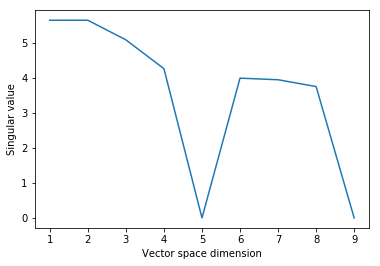

Vector space dimensionality = 8
Singular value (8) = 3.7
Max singular value (1) = 5.6
Singular value (8) = 3.7385588793217883e-10
Silhouette index in a range of cluster numbers


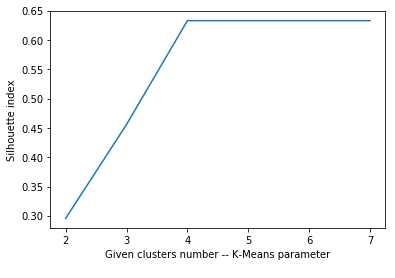

Optimal number of clusters: 4
Cluster words in vector space, axes 1 and 3


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['.', 'LEFT-WALL', 'has', 'isa']","[0, 0, 0, 0]"
C00,C02,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C03,0.0,"['feather', 'fin', 'scale', 'wing']","[0, 0, 0, 0]"
C00,C04,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"



Category list - 4 lines, saved to /home/obaskov/language-learning/output/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/disjuncts-DRK-disjuncts/Left-Wall/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['.', 'LEFT-WALL', 'has', 'isa']",[],[],"['C03C01-', 'C02C01-', 'C01C04+', 'C01C03+', 'C04C01- & C01C03+', 'C03C01- & C01C03+', 'C04C01- & C01C02+', 'C03C01- & C01C02+']"
C02,"['bird', 'extremity', 'fish']",[],[],"['C01C02- & C02C01+', 'C01C02- & C02C01+', 'C01C02- & C02C01+']"
C03,"['feather', 'fin', 'scale', 'wing']",[],[],"['C01C03- & C03C01+', 'C01C03- & C03C01+', 'C01C03- & C03C01+', 'C01C03- & C03C01+']"
C04,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C01C04- & C04C01+', 'C01C04- & C04C01+', 'C01C04- & C04C01+', 'C01C04- & C04C01+']"


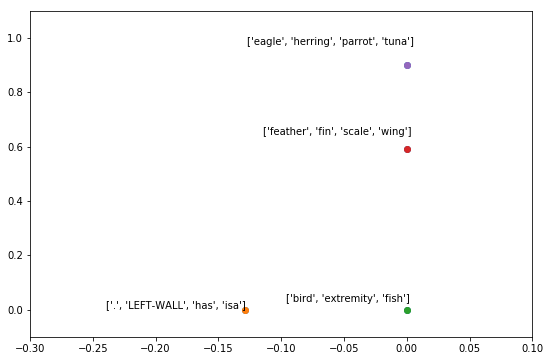

In [4]:
left_wall = 'LEFT-WALL'
context = 2                     # 2+: 'dusjuncts' / 1: connectors
word_space = 'vectors'          # 'vectors' / 'discrete' - no dimensionality reduction
dim_max = 100                   # max vector space dimensionality
sv_min = 0.1                    # minimal singular value (fraction of the max value)
dim_reduction = 'svm'           # 'svm' / 'none' (discrete word_space, group)
clustering = 'kmeans'           #
grammar_rules = 2               # 1: connectors / 2+: 'dusjuncts'
verbose = 'mid'

input_dir = module_path + '/data/POC_Turtle/MST_fixed_manually/'
# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + 'MST_fixed_manually/disjuncts-DRK-disjuncts/Left-Wall/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, tmpath, verbose, \
    parse_mode, left_wall, period, context, window, weighting, group, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level,
    generalization, merge, aggregate, grammar_rules)

## MST fixed manually, no LEFT-WALL

Directory /home/obaskov/language-learning/output/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_fixed_manually/disjuncts-DRK-disjuncts/no_Left-Wall/ exists.
14 unique words and 23 unique links form 38 unique word-link pairs from 48 parsed items


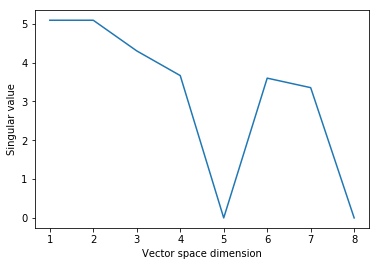

Vector space dimensionality = 7
Singular value (7) = 3.4
Max singular value (1) = 5.1
Singular value (7) = 1.1697624286823515e-09
Silhouette index in a range of cluster numbers


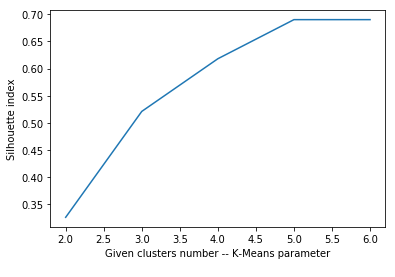

Optimal number of clusters: 5
Cluster words in vector space, axes 1 and 3


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,['isa'],[0]
C00,C02,0.0,"['.', 'has']","[0, 0]"
C00,C03,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C04,0.0,"['feather', 'fin', 'scale', 'wing']","[0, 0, 0, 0]"
C00,C05,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"



Category list - 5 lines, saved to /home/obaskov/language-learning/output/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_fixed_manually/disjuncts-DRK-disjuncts/no_Left-Wall/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,['isa'],[],[],"['C04C01- & C01C03+', 'C05C01- & C01C03+']"
C02,"['.', 'has']",[],[],"['C03C02-', 'C04C02-', 'C05C02- & C02C04+', 'C04C02- & C02C04+']"
C03,"['bird', 'extremity', 'fish']",[],[],"['C01C03- & C03C02+', 'C01C03- & C03C02+', 'C01C03- & C03C02+']"
C04,"['feather', 'fin', 'scale', 'wing']",[],[],"['C02C04- & C04C02+', 'C02C04- & C04C02+', 'C04C02+', 'C04C01+', 'C02C04- & C04C02+', 'C02C04- & C04C02+', 'C04C02+', 'C04C01+']"
C05,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C05C02+', 'C05C01+', 'C05C02+', 'C05C01+', 'C05C02+', 'C05C01+', 'C05C02+', 'C05C01+']"


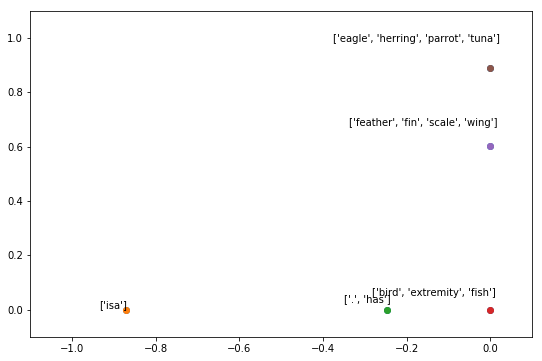

In [5]:
left_wall = ''
prj_dir = batch_dir + 'MST_fixed_fixed_manually/disjuncts-DRK-disjuncts/no_Left-Wall/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, tmpath, verbose, \
    parse_mode, left_wall, period, context, window, weighting, group, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level,
    generalization, merge, aggregate, grammar_rules)

## R=6_Weight=6:R, no LEFT-WALL (OK)

Directory /home/obaskov/language-learning/output/Left-Wall-2018-04-14/POC-Turtle/R=6_Weight=6:R/disjuncts-DRK-disjuncts/no_Left-Wall/ exists.
14 unique words and 25 unique links form 38 unique word-link pairs from 48 parsed items


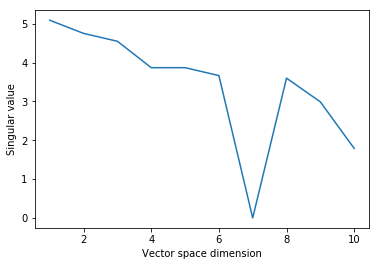

Vector space dimensionality = 10
Singular value (10) = 1.8
Max singular value (1) = 5.1
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


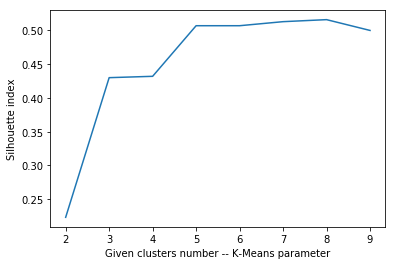

Optimal number of clusters: 5
Cluster words in vector space, axes 1 and 3


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,['scale'],[0]
C00,C02,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C03,0.0,"['.', 'feather', 'fin', 'has', 'wing']","[0, 0, 0, 0, 0]"
C00,C04,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C05,0.0,['isa'],[0]



Category list - 5 lines, saved to /home/obaskov/language-learning/output/Left-Wall-2018-04-14/POC-Turtle/R=6_Weight=6:R/disjuncts-DRK-disjuncts/no_Left-Wall/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,['scale'],[],[],['C03C01- & C03C01- & C01C03+']
C02,"['bird', 'extremity', 'fish']",[],[],"['C05C02- & C02C03+', 'C05C02- & C02C03+', 'C05C02- & C02C03+']"
C03,"['.', 'feather', 'fin', 'has', 'wing']",[],[],"['C03C03-', 'C02C03-', 'C01C03-', 'C03C03- & C03C03- & C03C03+', 'C03C03- & C03C03+', 'C03C05+', 'C03C01+', 'C03C03+', 'C04C03- & C03C03+', 'C03C01+', 'C03C03- & C03C03+', 'C03C03+', 'C03C05+']"
C04,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C04C05+', 'C04C03+', 'C04C05+', 'C04C03+', 'C04C05+', 'C04C03+', 'C04C05+', 'C04C03+']"
C05,['isa'],[],[],"['C04C05- & C05C02+', 'C03C05- & C05C02+']"


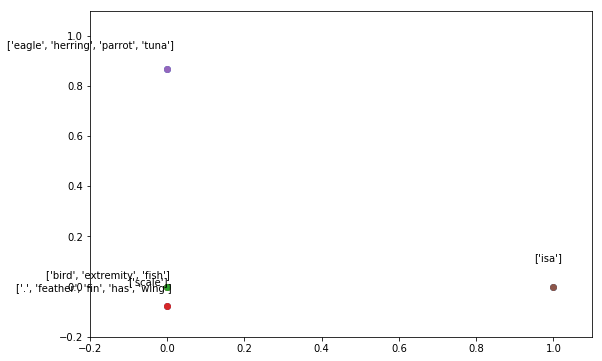

In [6]:
context = 2
#left_wall = 'LEFT-WALL'
left_wall = ''

input_dir = module_path + '/data/POC_Turtle/R=6_Weight=6:R/'
prj_dir = batch_dir + 'R=6_Weight=6:R/disjuncts-DRK-disjuncts/no_Left-Wall/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, tmpath, verbose, \
    parse_mode, left_wall, period, context, window, weighting, group, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level,
    generalization, merge, aggregate, grammar_rules)

## R=6_Weight=6:R, LEFT-WALL -- SVM error

context = 2
left_wall = 'LEFT-WALL'

input_dir = module_path + '/data/POC_Turtle/R=6_Weight=6:R/'
prj_dir = batch_dir + 'R=6_Weight=6:R/disjuncts-DRK-disjuncts/Left-Wall/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, tmpath, verbose, \
    parse_mode, left_wall, period, context, window, weighting, group, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level,
    generalization, merge, aggregate, grammar_rules)

# POC-Turtle corpus, batch mode

In [7]:
verbose = 'mid'
input_batch = module_path + '/data/POC_Turtle/'
dirs = sorted([x[0] for x in os.walk(input_batch)])[1:]
print('Input data:')
for d in dirs: print(d)
batch_dir = module_path + '/output/Left-Wall-2018-04-14/POC-Turtle/'

Input data:
/home/obaskov/language-learning/data/POC_Turtle/LG_ANY_all_parses
/home/obaskov/language-learning/data/POC_Turtle/MST_fixed_manually
/home/obaskov/language-learning/data/POC_Turtle/R=6_Weight=1
/home/obaskov/language-learning/data/POC_Turtle/R=6_Weight=6:R


## Clustering -- "DRK" -- SVM and K-Means

In [8]:
context = 1  # connectors
verbose = 'none'
print('Link Grammar rules saved to:\n')
for d in dirs:
    #-print('Input directory:', d)
    for i,context in enumerate(['connectors']):
        for j,rules in enumerate(['connectors', 'disjuncts']):
            prj_d = batch_dir + d[d.rfind('/')+1:] + '/'+context+'-DRK-'+rules+'/'
            for left_wall in ['LEFT-WALL', '']:
                if left_wall == '': prj_dir = prj_d + 'no_LEFT-WALL/'
                else: prj_dir = prj_d + left_wall + '/'
                if check_dir(prj_dir, True, 'none'):
                    rules = learn_grammar(d, prj_dir, prj_dir, tmpath, verbose, \
                        parse_mode, left_wall, period, i, window, weighting, group, \
                        word_space, dim_max, sv_min, dim_reduction, \
                        clustering, cluster_range, cluster_criteria, cluster_level,
                        generalization, merge, aggregate, j)
                    print(rules.split('\n')[-1][65:], '\n')

Link Grammar rules saved to:

/Left-Wall-2018-04-14/POC-Turtle/LG_ANY_all_parses/connectors-DRK-connectors/LEFT-WALL/poc-english_3C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/LG_ANY_all_parses/connectors-DRK-connectors/no_LEFT-WALL/poc-english_4C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/LG_ANY_all_parses/connectors-DRK-disjuncts/LEFT-WALL/poc-english_3C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/LG_ANY_all_parses/connectors-DRK-disjuncts/no_LEFT-WALL/poc-english_4C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/connectors-DRK-connectors/LEFT-WALL/poc-english_3C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/connectors-DRK-connectors/no_LEFT-WALL/poc-english_3C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/connectors-DRK-disjuncts/LEFT-WALL/poc-english_3C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/connec

## Grouping lexical entries ("Disjuncts - ILE - disjuncts")

In [9]:
context = 2          # actually set below (i)
grammar_rules = 2    # actually set below (j)
word_space = 'discrete'
dim_reduction = 'none'
clustering = 'group'
print('Link Grammar rules saved to:\n')
verbose = 'none'
for d in dirs:
    for i,context in enumerate(['disjuncts']):
        for j,rules in enumerate(['disjuncts']):
            prj_d = batch_dir + d[d.rfind('/')+1:] + '/'+context+'-ILE-'+rules+'/'
            for left_wall in ['LEFT-WALL', '']:
                if left_wall == '': prj_dir = prj_d + 'no_LEFT-WALL/'
                else: prj_dir = prj_d + left_wall + '/'
                if check_dir(prj_dir, True, 'none'):
                    rules = learn_grammar(d, prj_dir, prj_dir, tmpath, verbose, \
                        parse_mode, left_wall, period, i, window, weighting, group, \
                        word_space, dim_max, sv_min, dim_reduction, \
                        clustering, cluster_range, cluster_criteria, cluster_level,
                        generalization, merge, aggregate, j)
                    print(rules.split('\n')[-1][65:], '\n')

Link Grammar rules saved to:

/Left-Wall-2018-04-14/POC-Turtle/LG_ANY_all_parses/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_7C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/LG_ANY_all_parses/disjuncts-ILE-disjuncts/no_LEFT-WALL/poc-english_6C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_6C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/MST_fixed_manually/disjuncts-ILE-disjuncts/no_LEFT-WALL/poc-english_5C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/R=6_Weight=1/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_8C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/R=6_Weight=1/disjuncts-ILE-disjuncts/no_LEFT-WALL/poc-english_7C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/R=6_Weight=6:R/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_7C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC-Turtle/R=6_Weight=6:R/disjuncts-ILE-disjuncts/no_LEFT-WAL

# POC-English-NoAmb corpus, batch mode

In [10]:
verbose = 'none'
input_batch = module_path + '/data/POC_English_NoAmb/'
dirs = sorted([x[0] for x in os.walk(input_batch)])[1:]
print('dirs:')
for d in dirs: print(d)
batch_dir = module_path + '/output/Left-Wall-2018-04-14/POC_English_NoAmb/'

dirs:
/home/obaskov/language-learning/data/POC_English_NoAmb/Andres_parses_gold_2018-04-06
/home/obaskov/language-learning/data/POC_English_NoAmb/LG_ANY_all_parses
/home/obaskov/language-learning/data/POC_English_NoAmb/LG_English
/home/obaskov/language-learning/data/POC_English_NoAmb/MST_fixed_manually
/home/obaskov/language-learning/data/POC_English_NoAmb/R=6_distance=1
/home/obaskov/language-learning/data/POC_English_NoAmb/R=6_distance=6:R


## Clustering ("DRK" -- SVM and K-Means)

In [11]:
verbose = 'none'
print('Link Grammar rules saved to:\n')
for d in dirs:
    for i,context in enumerate(['connectors', 'disjuncts']):
        for j,rules in enumerate(['connectors', 'disjuncts']):
            prj_d = batch_dir + d[d.rfind('/')+1:] + '/'+context+'-DRK-'+rules+'/'
            for left_wall in ['LEFT-WALL', '']:
                if left_wall == '': prj_dir = prj_d + 'no_LEFT-WALL/'
                else: prj_dir = prj_d + left_wall + '/'
                if check_dir(prj_dir, True, 'none'):
                    rules = learn_grammar(d, prj_dir, prj_dir, tmpath, verbose, \
                        parse_mode, left_wall, period, i, window, weighting, group, \
                        word_space, dim_max, sv_min, dim_reduction, \
                        clustering, cluster_range, cluster_criteria, cluster_level,
                        generalization, merge, aggregate, j)
                    print(rules.split('\n')[-1][65:], '\n')

Link Grammar rules saved to:

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/connectors-DRK-connectors/LEFT-WALL/poc-english_10C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/connectors-DRK-connectors/no_LEFT-WALL/poc-english_9C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/connectors-DRK-disjuncts/LEFT-WALL/poc-english_10C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/connectors-DRK-disjuncts/no_LEFT-WALL/poc-english_9C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/disjuncts-DRK-connectors/LEFT-WALL/poc-english_15C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/disjuncts-DRK-connectors/no_LEFT-WALL/poc-english_14C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/dis

## Grouping lexical entries ("Disjuncts - ILE - disjuncts")

In [12]:
verbose = 'none'
context = 2          # 'disjuncts' - actually set below (i)
grammar_rules = 2    # 'disjuncts' - actually set below (j)
word_space = 'discrete'
dim_reduction = 'none'
clustering = 'group'
verbose = 'none'
print('Link Grammar rules saved to:\n')
for d in dirs:
    for i,context in enumerate(['disjuncts']):
        for j,rules in enumerate(['disjuncts']):
            prj_d = batch_dir + d[d.rfind('/')+1:] + '/'+context+'-ILE-'+rules+'/'
            for left_wall in ['LEFT-WALL', '']:
                if left_wall == '': prj_dir = prj_d + 'no_LEFT-WALL/'
                else: prj_dir = prj_d + left_wall + '/'
                if check_dir(prj_dir, True, 'none'):
                    rules = learn_grammar(d, prj_dir, prj_dir, tmpath, verbose, \
                        parse_mode, left_wall, period, i, window, weighting, group, \
                        word_space, dim_max, sv_min, dim_reduction, \
                        clustering, cluster_range, cluster_criteria, cluster_level,
                        generalization, merge, aggregate, j)
                    print(rules.split('\n')[-1][65:], '\n')

Link Grammar rules saved to:

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_10C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/Andres_parses_gold_2018-04-06/disjuncts-ILE-disjuncts/no_LEFT-WALL/poc-english_9C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/LG_ANY_all_parses/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_13C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/LG_ANY_all_parses/disjuncts-ILE-disjuncts/no_LEFT-WALL/poc-english_12C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/LG_English/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_11C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/LG_English/disjuncts-ILE-disjuncts/no_LEFT-WALL/poc-english_10C_2018-04-17_0007.4.0.dict 

/Left-Wall-2018-04-14/POC_English_NoAmb/MST_fixed_manually/disjuncts-ILE-disjuncts/LEFT-WALL/poc-english_9C_2018-04-17_0007.4.0.dict 

/Left-W